In [1]:
#import packages

import numpy as np
import pandas as pd
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
import os
%matplotlib notebook

In [2]:
#read CSV File
os.chdir('C:/Users/siree/OneDrive/Desktop/EDA_Files')

In [3]:
#getting working directory
cwd = os.getcwd()
print(cwd)

C:\Users\siree\OneDrive\Desktop\EDA_Files


In [4]:
#reading the CSV file
data = pd.read_csv('churn_clean.csv')

In [5]:
#selecting important variables for t-test
EDA_data = data[['Churn', 'MonthlyCharge']]
EDA_data

,Churn,MonthlyCharge
0,No,172.455519
1,Yes,242.632554
2,No,159.947583
3,No,119.956840
4,Yes,149.948316
...,...,...
9995,No,159.979400
9996,No,207.481100
9997,No,169.974100
9998,No,252.624000


In [6]:
#t-test
churned = EDA_data[EDA_data['Churn'] == 'Yes']['MonthlyCharge']
not_churned = EDA_data[EDA_data['Churn'] == 'No']['MonthlyCharge']

t_stat, p_value = ttest_ind(churned, not_churned)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 40.18947672237426
P-value: 0.0


In [7]:
#Univariate statistics
continuous_vars1 = ['Income', 'MonthlyCharge']
continuous_data1 = data[continuous_vars1]

              Income  MonthlyCharge
count   10000.000000   10000.000000
mean    39806.926771     172.624816
std     28199.916702      42.943094
min       348.670000      79.978860
25%     19224.717500     139.979239
50%     33170.605000     167.484700
75%     53246.170000     200.734725
max    258900.700000     290.160419


<IPython.core.display.Javascript object>


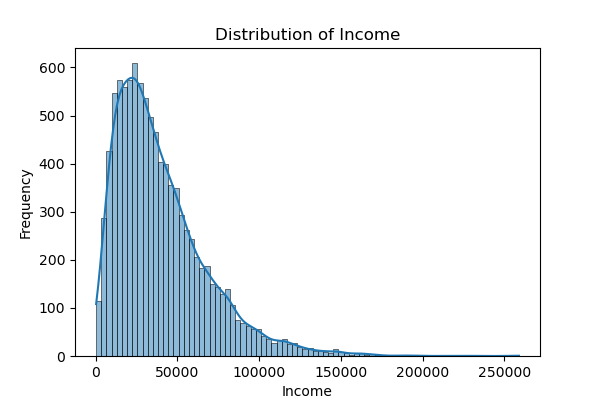

<IPython.core.display.Javascript object>


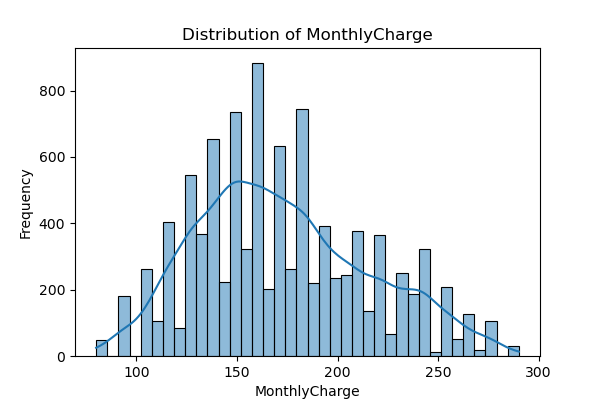

In [16]:
categorical_vars1 = ['Churn', 'Techie']
print(continuous_data1.describe())
for var in continuous_vars1:
    plt.figure(figsize = (6, 4))
    sns.histplot(data[var], kde = True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
#Summary statistics for categorical variables
print("\nSummary Statistics for Categorical Variables:")
for var in categorical_vars1:
    print(data[var].value_counts(normalize = True))


Summary Statistics for Categorical Variables:
No     0.735
Yes    0.265
Name: Churn, dtype: float64
No     0.8321
Yes    0.1679
Name: Techie, dtype: float64


<IPython.core.display.Javascript object>


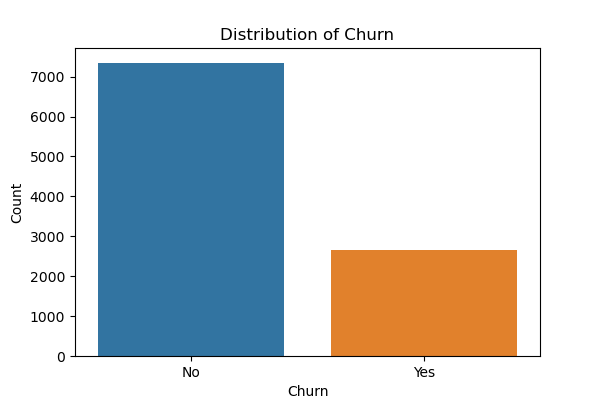

<IPython.core.display.Javascript object>


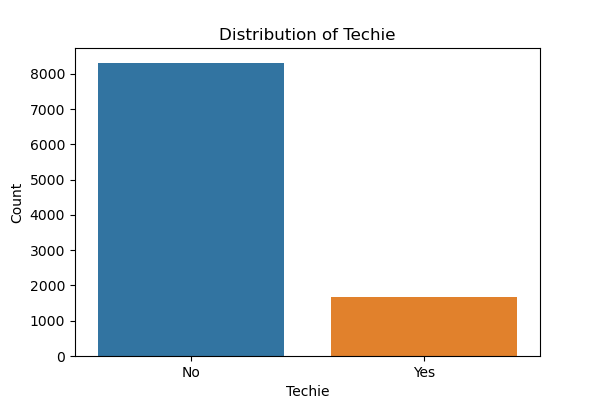

In [10]:
#Visualization for categorical variables
for var in categorical_vars1:
    plt.figure(figsize = (6, 4))
    sns.countplot(x = var, data = data)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

In [11]:
#bivariates statistics
continuous_vars2 = ['Outage_sec_perweek', 'Tenure']
categorical_vars2 = ['OnlineSecurity', 'TechSupport']
continuous_data2 = data[continuous_vars2]

Correlation Matrix:
                     Outage_sec_perweek    Tenure
Outage_sec_perweek            1.000000  0.002932
Tenure                        0.002932  1.000000


<IPython.core.display.Javascript object>


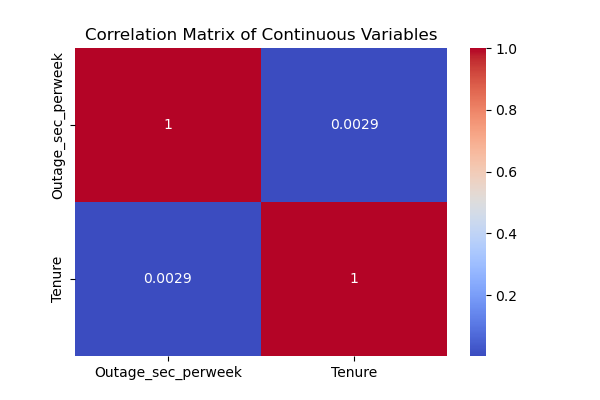

In [12]:
#correlation
correlation_matrix = continuous_data2.corr()
print("Correlation Matrix:\n", correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot = True, cmap ='coolwarm')
plt.title("Correlation Matrix of Continuous Variables")
plt.show()

Chi-Square Test for OnlineSecurity and Churn:
Chi2: 1.769750039857818, p-value: 0.18341301659758166

Churn             No   Yes
OnlineSecurity            
No              4693  1731
Yes             2657   919




<IPython.core.display.Javascript object>


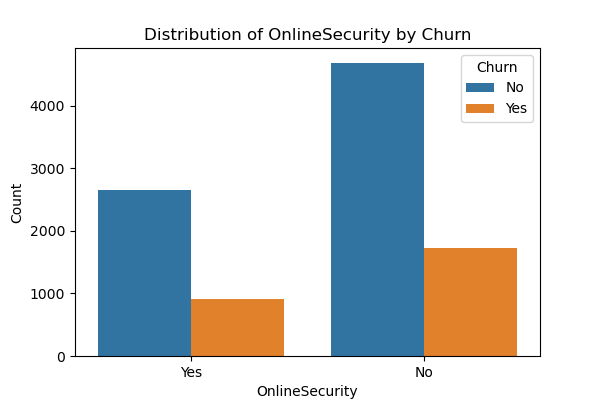

Chi-Square Test for TechSupport and Churn:
Chi2: 3.461224489795918, p-value: 0.06282377493466387

Churn          No   Yes
TechSupport            
No           4634  1616
Yes          2716  1034




<IPython.core.display.Javascript object>


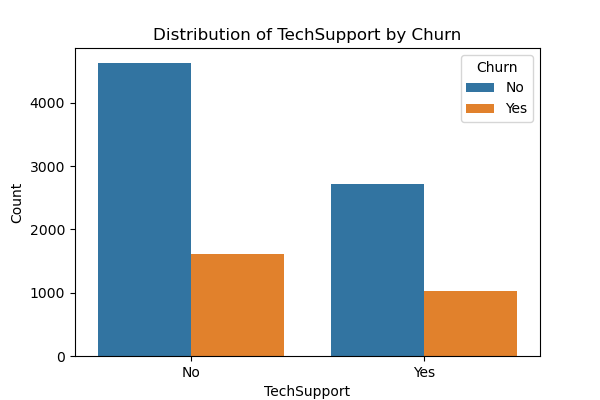

In [13]:
for var in categorical_vars2:
    cross_tab = pd.crosstab(data[var], data['Churn'])
    chi2, p, dof, expected = stats.chi2_contingency(cross_tab)
    print(f"Chi-Square Test for {var} and Churn:")
    print(f"Chi2: {chi2}, p-value: {p}\n")
    print(cross_tab)
    print("\n")

    plt.figure(figsize = (6, 4))
    sns.countplot(x = var, data = data, hue ='Churn')
    plt.title(f'Distribution of {var} by Churn')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

<IPython.core.display.Javascript object>


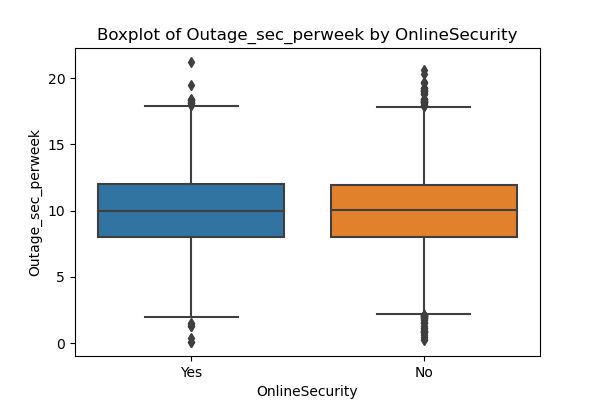

<IPython.core.display.Javascript object>


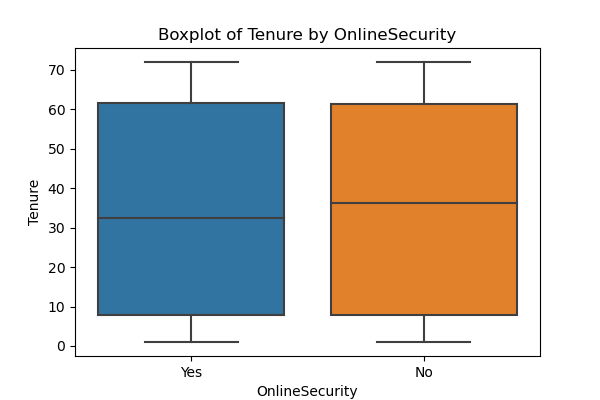

<IPython.core.display.Javascript object>


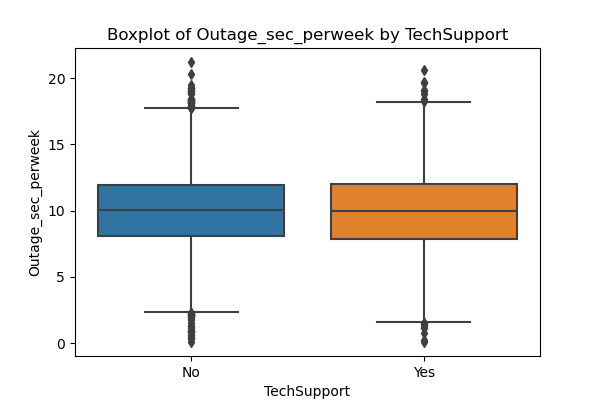

<IPython.core.display.Javascript object>


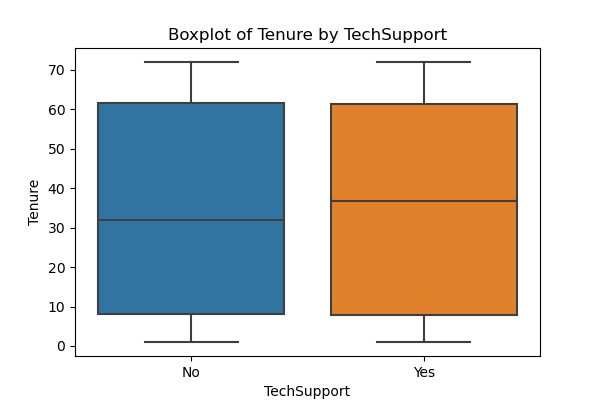

In [14]:
#boxplot
for cat_var in categorical_vars2:
    for cont_var in continuous_vars2:
        plt.figure(figsize = (6, 4))
        sns.boxplot(x = data[cat_var], y = data[cont_var])
        plt.title(f"Boxplot of {cont_var} by {cat_var}")
        plt.xlabel(cat_var)
        plt.ylabel(cont_var)
        plt.show()

<IPython.core.display.Javascript object>


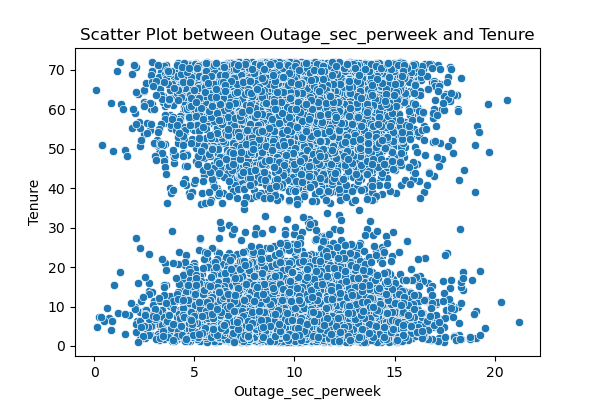

In [15]:
#Scatterplot for continous variables
plt.figure(figsize = (6, 4))
sns.scatterplot(x = continuous_data2[continuous_vars2[0]], y = continuous_data2[continuous_vars2[1]])
plt.title(f"Scatter Plot between {continuous_vars2[0]} and {continuous_vars2[1]}")
plt.xlabel(continuous_vars2[0])
plt.ylabel(continuous_vars2[1])
plt.show()